# Implanatação de algumas Bibliotacas

In [1]:
import csv
import numpy as np
import pandas as pd
import sys
from tkinter import Tk
from tkinter import filedialog
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
#import os
#from ciso8601 import parse_datetime

# Criando variaveis para os arquivos permitidos

In [2]:
p_cmpid   = pd.read_excel('PQ376.xlsx')      ### leitura do arquivo com os sinais dos cpmids do quadro 376
p_tpmoid  = pd.read_excel('Pt376.xlsx')      ### leitura do arquivo com os sinais dos tpmoids do quadro 376
param     = pd.read_excel('LQ376.xlsx')      ### leitura do arquivo com o layout atualizado do quadro 376

#p_cmpid2  = pd.read_excel('PQ377.xlsx')      ### leitura do arquivo com os sinais dos cpmids do quadro 377
#param2    = pd.read_excel('LQ377.xlsx')      ### leitura do arquivo com o layout atualizado do quadro 377

In [3]:
control  = 0                                              ### controle de backup    
p_cmpid['cmpid'] = p_cmpid.cmpid.astype(str)              ### transforma o campo cmpid - QE 376 - do arq auxiliar para string 
#p_cmpid2['cmpid'] = p_cmpid2.cmpid.astype(str)            ### transforma o campo cmpid - QE 377 - do arq auxiliar para string 

In [4]:
## FUNÇÃO PARA SELEÇÃO DO ARQUIVO

class qe_s:

    def __init__(self):
        self.df = {nome[s]: [] for s in range(nome.shape[0])}
  
    def make_df(self):
        lines = []
        root = Tk()
        root.attributes("-topmost", True)
        root.withdraw()
        for file in filedialog.askopenfilenames(filetypes=[("Arquivos de Text", "*.txt")]):
            for line in open(file, encoding="utf-8"):
                line = line.replace(",",".").strip()
                for x in range(nome.shape[0]):
                    self.df[nome[x]].append(line[i[x]:j[x]])
                    
        return pd.DataFrame(self.df)

In [5]:
nome     = param.Campo                      ### guarda os nomes das colunas existentes no quadro 376
i        = param.Ind_inf                    ### guarda a posição no arquivo que inicia um determinado campo
j        = param.Ind_sup                    ### guarda a posição no arquivo que termina um determinado campo

quadro = qe_s()       
df_main = quadro.make_df()
df_main

## SELECINE O(S) ARQUIVO(S) DESEJADO(S)

,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,ESRDATAREG,ESRVALORMOV,ESRDATACOMUNICA,ESRCODCESS,ESRNUMSIN,ESRVALORMON
0,0000001,05991,20200131,376,0001,1001,0118,20190220,20200220,20200126,20200130,0000250000.00,20200130,05991,00000000511800000512,0000000000.00
1,0000002,05991,20200131,376,0001,1001,0118,20190630,20200630,20191030,20200115,0000025000.00,20200115,05991,00000000511800000493,0000000000.00
2,0000003,05991,20200131,376,0001,1001,0118,20190630,20200630,20191120,20200124,0000025000.00,20200124,05991,00000000511800000504,0000000000.00
3,0000004,05991,20200131,376,0001,1001,0118,20190630,20200630,20200112,20200116,0000025000.00,20200116,05991,00000000511800000494,0000000000.00
4,0000005,05991,20200131,376,0001,1001,0118,20190930,20200630,20191228,20200117,0000025000.00,20200117,05991,00000000511800000495,0000000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49217,0007741,05991,20200731,376,0002,1012,0196,20181231,20191231,20190611,20190701,0000000000.00,20190701,31623,00000000519600001253,-000003530.76
49218,0007742,05991,20200731,376,0002,1012,0196,20190412,20200310,20190818,20190902,0000000000.00,20190902,31623,00000000519600001309,-000002874.01
49219,0007743,05991,20200731,376,0002,1012,0196,20190310,20200310,20190518,20191004,0000000000.00,20191004,31623,00000000519600001355,-000000276.03
49220,0007744,05991,20200731,376,0002,1012,0196,20180505,20190505,20190125,20190129,0000012923.36,20190129,31623,00000000519600001097,0000000000.00


In [6]:
###################################
###Importacao do Quadro376.xlsx ###
####que serão usados para fins#####
######### de comparação ###########
###################################

#Pasta Cod_SUSEP
arq_entcod = pd.read_excel('Quadro376.xlsx','Cod_SUSEP',fileEncoding = "UTF-8",encoding = 'latin_1', dtype=str)

#Pasta MRFMESANO
arq_mrfmesano = pd.read_excel('Quadro376.xlsx','MRFMESANO',fileEncoding = "UTF-8",encoding = 'latin_1', dtype=str)

#Pasta TPMOID
arq_tpmoid = pd.read_excel('Quadro376.xlsx','TPMOID',fileEncoding = "UTF-8",encoding = 'latin_1', dtype=str)

#Pasta rel_CMPID_TPMOID
arq_relacao = pd.read_excel('Quadro376.xlsx','rel_CMPID_TPMOID',fileEncoding = "UTF-8",encoding = 'latin_1', dtype=str)

#Pasta CMPID
arq_cmpid = pd.read_excel('Quadro376.xlsx','CMPID',fileEncoding = "UTF-8",encoding = 'latin_1', dtype=str)

#Pasta RAMCODIGO
arq_ramcod = pd.read_excel('Quadro376.xlsx','RAMCODIGO',fileEncoding = "UTF-8",encoding = 'latin_1', dtype=str)

In [7]:
# Criando uma lista para guardar todas as criticas impeditivas
criticas_impeditivas = []
criticas = []

# Criticas 376 (Validacoes)

In [8]:
#7392.3 Verifica se o campo sequencial ESRSEQ é uma sequência válida, que se inicia em 0000001 
array3 = df_main['ESRSEQ']
x = list(array3)                                     ##Dados do arquivo
arrayteste = x[:]
arrayteste.sort()                                    ##Dados sequenciados
if (arrayteste == x):                                ##Comparando
    print('Tudo certo, esta de forma sequencial.')
else: 
    print('ERRO!!!, Não prossiga.')
    critica7392_3 = str('Critica 7392.3, Não temos uma sequencia valida na coluna ESRSEQ')
    criticas_impeditivas.append(critica7392_3)

ERRO!!!, Não prossiga.


In [9]:
#7392.2 Verifica o tamanho padrão da linha (deve conter 126 caracteres)
tamanho = 0
for i in range(0,df_main.shape[0]):                    #Passando por cada linha
    for iten in df_main.columns:                       #Passando por cada coluna
        tamanho = tamanho + len(df_main[iten][i])      #Contando Caracteres por linha
    if tamanho != 126:
        print('Erro na linha ',i,' o número de caracteres é de: ',tamanho)
        critica7392_2 = ("Critica 7392.2, Erro na linha ",i," o número de caracteres é de: ",tamanho)
        criticas_impeditivas.append(critica7392_2)
    tamanho = 0
        

#len(df_main.iloc[0])

In [10]:
#7392.4 Verifica se o campo ENTCODIGO corresponde à sociedade que está enviando o FIP/SUSEP
entcod = set(arq_entcod['Cod_SUSEP'].astype('str'))                   #Escolhendo a coluna do arquivo modelo
dadosentcod = set(df_main['ENTCODIGO'])                               #Escolhendo a coluna dos dados
for itemtentcod in dadosentcod: 
    if itemtentcod not in entcod:
        print('ERRO!! ENTCODIGO não corresponde a uma operação valida', itemtentcod)
        critica7392_4 = ('Critica 7392.4, ENTCODIGO não corresponde a uma operação valida', itemtentcod)
        criticas_impeditivas.append(critica7392_4)
    else:
        print('ENTCODIGO corresponde a um tipo de operação válida.', itemtentcod)
        continue

ENTCODIGO corresponde a um tipo de operação válida. 05991


In [11]:
#7392.5 Verifica se o campo MRFMESANO corresponde, respectivamente, ao ano, mês e último dia do mês de referência do FIP/SUSEP
df_main.loc[:,'DTMRFMESANO'] = df_main['MRFMESANO'].astype('datetime64')     #Criando uma nova coluna no formato Date
mrfmesano = set(arq_mrfmesano['DATAS'].astype('datetime64'))                 #Escolhendo a coluna do arquivo modelo
dadosmrfmesano = set(df_main['DTMRFMESANO'])                                 #Escolhendo a coluna dos dados
for itemmrfmesano in dadosmrfmesano: 
    if itemmrfmesano not in mrfmesano:
        print('ERRO!! MRFMESANO não corresponde a uma operação valida', itemmrfmesano)
        critica7392_5 = ('Critica 7392.5, MRFMESANO não corresponde a uma Data valida', itemmrfmesano)
        criticas_impeditivas.append(critica7392_5)
    else:
        print('MRFMESANO corresponde a uma Data válida.', itemmrfmesano)
        continue

MRFMESANO corresponde a uma Data válida. 2020-07-31 00:00:00
MRFMESANO corresponde a uma Data válida. 2020-06-30 00:00:00
MRFMESANO corresponde a uma Data válida. 2020-02-29 00:00:00
MRFMESANO corresponde a uma Data válida. 2020-04-30 00:00:00
MRFMESANO corresponde a uma Data válida. 2020-03-31 00:00:00
MRFMESANO corresponde a uma Data válida. 2020-01-31 00:00:00
MRFMESANO corresponde a uma Data válida. 2020-05-31 00:00:00


In [12]:
#7392.6 Verifica se o campo QUAID corresponde ao quadro 376
array6 = set(df_main['QUAID'])           ##Verificando todos os Quadros que estamos tratando no documento.
for itemarray6 in array6:
    if itemarray6 == '376':
        print('Este se trata do Quadro:',itemarray6)
    else:
        print('ERRO!! Este se trata do Quadro:',itemarray6)
        critica7392_6 = ('Critica 7392.6, Este esta se tratando do(s) Quadro(s):',itemarray6)
        criticas_impeditivas.append(critica7392_6)

Este se trata do Quadro: 376


In [13]:
#7392.7 Verifica se o campo TPMOID corresponde a um tipo de movimento válido
tpmoid = set(arq_tpmoid['TPMOID'].astype('str'))                                    #Escolhendo a coluna do arquivo modelo
dadostpmoid = set(df_main['TPMOID'])                                                #Escolhendo a coluna dos dados
for itemtpmoid in dadostpmoid: 
    if itemtpmoid not in tpmoid:
        print('ERRO!! TPMOID não corresponde a uma operação valida', itemtpmoid)
        critica7392_7 = ('Critica 7392.7, TPMOID não corresponde a uma operação valida', itemtpmoid)
        criticas_impeditivas.append(critica7392_7)
    else:
        print('TPMOID corresponde a um tipo de operação válida.', itemtpmoid)
        continue

TPMOID corresponde a um tipo de operação válida. 0004
TPMOID corresponde a um tipo de operação válida. 0006
TPMOID corresponde a um tipo de operação válida. 0002
TPMOID corresponde a um tipo de operação válida. 0014
TPMOID corresponde a um tipo de operação válida. 0005
TPMOID corresponde a um tipo de operação válida. 0003
TPMOID corresponde a um tipo de operação válida. 0001


In [14]:
#7392.8 Valida a correspondência entre os campos TPMOID e CMPID
mod_relacao = set(arq_relacao['relacao'].astype('str'))
relacao = [df_main['CMPID'] + df_main['TPMOID']]
for itemrelacao in relacao:
    relacao2 = set(itemrelacao)
    for itemrelacao2 in relacao2:
        if itemrelacao2 not in mod_relacao:
            print('ERRO!! A relação ',itemrelacao2,' (CMPID/TPMOID) não é uma relação possivel.')
            critica7392_8 = ('Critica 7392.8, A relação ',itemrelacao2,' (CMPID/TPMOID) não é uma relação possivel.')
            criticas_impeditivas.append(critica7392_8)
        else:
            print('A relação ',itemrelacao2,' (CMPID/TPMOID) é uma relação possivel.')
        continue

A relação  10070003  (CMPID/TPMOID) é uma relação possivel.
A relação  10020002  (CMPID/TPMOID) é uma relação possivel.
A relação  10010003  (CMPID/TPMOID) é uma relação possivel.
A relação  10060004  (CMPID/TPMOID) é uma relação possivel.
A relação  10130005  (CMPID/TPMOID) é uma relação possivel.
A relação  10020003  (CMPID/TPMOID) é uma relação possivel.
A relação  10120001  (CMPID/TPMOID) é uma relação possivel.
A relação  10060003  (CMPID/TPMOID) é uma relação possivel.
A relação  10020001  (CMPID/TPMOID) é uma relação possivel.
A relação  10070002  (CMPID/TPMOID) é uma relação possivel.
A relação  10070006  (CMPID/TPMOID) é uma relação possivel.
A relação  10040001  (CMPID/TPMOID) é uma relação possivel.
A relação  10130006  (CMPID/TPMOID) é uma relação possivel.
A relação  10030002  (CMPID/TPMOID) é uma relação possivel.
A relação  10010004  (CMPID/TPMOID) é uma relação possivel.
A relação  10040002  (CMPID/TPMOID) é uma relação possivel.
A relação  10030001  (CMPID/TPMOID) é um

In [15]:
#7392.9 Verifica se o campo CMPID corresponde a um tipo de operação válida 
cmpid = set(arq_cmpid['CMPID'].astype('str'))                        #Escolhendo a coluna do arquivo modelo
dadoscmpid = set(df_main['CMPID'])                                   #Escolhendo a coluna dos dados
for itemcmpid in dadoscmpid: 
    if itemcmpid not in cmpid:
        print('ERRO!! CMPID não corresponde a uma operação valida', itemcmpid)
        critica7392_9 = ('Critica 7392.9, CMPID não corresponde a uma operação valida', itemcmpid)
        criticas_impeditivas.append(critica7392_9)
    else:
        print('CMPID corresponde a um tipo de operação válida.', itemcmpid)
        continue
#df_main[df_main["CMPID"]=="1111"]

CMPID corresponde a um tipo de operação válida. 1011
CMPID corresponde a um tipo de operação válida. 1006
CMPID corresponde a um tipo de operação válida. 1013
CMPID corresponde a um tipo de operação válida. 1007
CMPID corresponde a um tipo de operação válida. 1014
CMPID corresponde a um tipo de operação válida. 1002
CMPID corresponde a um tipo de operação válida. 1012
CMPID corresponde a um tipo de operação válida. 1005
CMPID corresponde a um tipo de operação válida. 1008
CMPID corresponde a um tipo de operação válida. 1003
CMPID corresponde a um tipo de operação válida. 1001
CMPID corresponde a um tipo de operação válida. 1004


In [16]:
#7392.10 Verifica se o campo RAMCODIGO corresponde, respectivamente, a um grupo de ramos e ramo válidos e operados pela companhia no mês de referência
ramcod = set(arq_ramcod['ramo_s1'].astype('str'))                       #Escolhendo a coluna do arquivo
dadosramcod = set(df_main['RAMCODIGO'])                                 #Escolhendo a coluna dos dados
for itemramcod in dadosramcod: 
    if itemramcod not in ramcod:
        print('ERRO!! RAMCODIGO não corresponde a uma operação valida', itemramcod)
        critica7392_10 = ('Critica 7392.10, RAMCODIGO não corresponde a uma operação valida', itemramcod)
        criticas_impeditivas.append(critica7392_10)
    else:
        print('RAMCODIGO corresponde a um tipo de operação válida.', itemramcod)
        continue

RAMCODIGO corresponde a um tipo de operação válida. 0118
RAMCODIGO corresponde a um tipo de operação válida. 0351
RAMCODIGO corresponde a um tipo de operação válida. 0776
RAMCODIGO corresponde a um tipo de operação válida. 0234
RAMCODIGO corresponde a um tipo de operação válida. 1164
RAMCODIGO corresponde a um tipo de operação válida. 0378
RAMCODIGO corresponde a um tipo de operação válida. 1104
RAMCODIGO corresponde a um tipo de operação válida. 0652
RAMCODIGO corresponde a um tipo de operação válida. 0748
RAMCODIGO corresponde a um tipo de operação válida. 0435
RAMCODIGO corresponde a um tipo de operação válida. 1433
RAMCODIGO corresponde a um tipo de operação válida. 0196
RAMCODIGO corresponde a um tipo de operação válida. 0775
RAMCODIGO corresponde a um tipo de operação válida. 0622
RAMCODIGO corresponde a um tipo de operação válida. 0621
RAMCODIGO corresponde a um tipo de operação válida. 1417
RAMCODIGO corresponde a um tipo de operação válida. 1130
RAMCODIGO corresponde a um tipo

In [17]:
#7392.11 Verifica se o campo RAMCODIGO não foi preenchido com os ramos 0588, 0589, 0983, 0986, 0991, 0992, 0994, 0996, 1066, 1383, 1386, 1391, 1392, 1396, 1603 e 2201 
ramcodver = set(arq_ramcod['RAMCODIGO_não_fazem_parte_376'].astype('str'))       #Escolhendo a coluna do arquivo modelo
dadosramcod = set(df_main['RAMCODIGO'])                                 #Escolhendo a coluna dos dados
for itemramcod in dadosramcod: 
    if itemramcod in ramcodver:
        print('ERRO!! RAMCODIGO não corresponde a uma operação valida', itemramcod)
        critica7392_11 = ('Critica 7392.11, RAMCODIGO não corresponde a uma operação valida', itemramcod)
        criticas_impeditivas.append(critica7392_11)
    else:
        print('RAMCODIGO corresponde a um tipo de operação válida.', itemramcod)
        continue

RAMCODIGO corresponde a um tipo de operação válida. 0118
RAMCODIGO corresponde a um tipo de operação válida. 0351
RAMCODIGO corresponde a um tipo de operação válida. 0776
RAMCODIGO corresponde a um tipo de operação válida. 0234
RAMCODIGO corresponde a um tipo de operação válida. 1164
RAMCODIGO corresponde a um tipo de operação válida. 0378
RAMCODIGO corresponde a um tipo de operação válida. 1104
RAMCODIGO corresponde a um tipo de operação válida. 0652
RAMCODIGO corresponde a um tipo de operação válida. 0748
RAMCODIGO corresponde a um tipo de operação válida. 0435
RAMCODIGO corresponde a um tipo de operação válida. 1433
RAMCODIGO corresponde a um tipo de operação válida. 0196
RAMCODIGO corresponde a um tipo de operação válida. 0775
RAMCODIGO corresponde a um tipo de operação válida. 0622
RAMCODIGO corresponde a um tipo de operação válida. 0621
RAMCODIGO corresponde a um tipo de operação válida. 1417
RAMCODIGO corresponde a um tipo de operação válida. 1130
RAMCODIGO corresponde a um tipo

In [18]:
#7392.13 Verifica se os campos ESRDATAINICIO, ESRDATAFIM, ESRDATAOCORR, ESRDATAREG e ESRDATACOMUNICA correspondem a uma data válida 

#####################################################
##Readicionando as colunas de Data de str para date##
#####################################################

df_main.loc[:,'DTESRDATAINICIO'] = df_main['ESRDATAINICIO'].astype('datetime64')
df_main.loc[:,'DTESRDATAFIM'] = df_main['ESRDATAFIM'].astype('datetime64')
df_main.loc[:,'DTESRDATAOCORR'] = df_main['ESRDATAOCORR'].astype('datetime64')
df_main.loc[:,'DTESRDATAREG'] = df_main['ESRDATAREG'].astype('datetime64')
df_main.loc[:,'DTESRDATACOMUNICA'] = df_main['ESRDATACOMUNICA'].astype('datetime64')

#Adicionado colunas DTESRDATAINICIO, DTESRDATAFIM, DTESRDATAOCORR, DTESRDATAREG e DTESRDATACOMUNICA no tipo Date

In [19]:
#7392.12 Verifica se o valor dos campos ESRVALORMOV e ESRVALORMON é float

###########################################
##Readicionando as colunas str para float##
###########################################

df_main.loc[:,'fESRVALORMOV'] = df_main['ESRVALORMOV'].astype('float64')
df_main.loc[:,'fESRVALORMON'] = df_main['ESRVALORMON'].astype('float64')

#Adicionado colunas fESRVALORMOV e fESRVALORMON no tipo Float

In [20]:
criticas_impeditivas  #Lista das criticas impeditivas

['Critica 7392.3, Não temos uma sequencia valida na coluna ESRSEQ']

In [21]:
df_criticas_i = pd.DataFrame(criticas_impeditivas)     #criacao do DataFrame das criticas impeditivas
df_criticas_i = df_criticas_i.rename(columns={0:'Descrição'})
df_criticas_i

,Descrição
0,"Critica 7392.3, Não temos uma sequencia valida..."


In [22]:
if criticas_impeditivas == []:                             # Verificando se a lista de criticas esta vazia
    print('Nenhuma Critica Impeditiva encontrada no Quadro 376')
else:
    print('Foi encontrada uma ou mais Criticas Impeditivas no Quadro 376')
    df_criticas_i.to_csv('Criticas_Impeditivas_376.csv')   # Gerando csv das criticas impeditivas

Foi encontrada uma ou mais Criticas Impeditivas no Quadro 376


# Criticas (Validacoes) Não Impeditivas

In [23]:
#7392.14 Verifica se o campo ESRCODCESS corresponde a um código de sociedade válido
dadosesrcodcess = set(df_main['ESRCODCESS'])       #Escolhendo a coluna dos dados
for itemtesrcodcess in dadosesrcodcess: 
    if itemtesrcodcess not in entcod:
        print('ERRO!! ESRCODCESS não corresponde a um código de sociedade válido', itemtesrcodcess)
        critica7392_14 = ('Critica 7392.14, ESRCODCESS corresponde a um código de sociedade válido', itemtesrcodcess)
        criticas.append(critica7392_14)
    else:
        print('ENTCODIGO corresponde a um tipo de operação válida.', itemtesrcodcess)
        continue

ERRO!! ESRCODCESS não corresponde a um código de sociedade válido 52876
ERRO!! ESRCODCESS não corresponde a um código de sociedade válido 58815
ENTCODIGO corresponde a um tipo de operação válida. 31623
ENTCODIGO corresponde a um tipo de operação válida. 02852
ENTCODIGO corresponde a um tipo de operação válida. 01431
ERRO!! ESRCODCESS não corresponde a um código de sociedade válido 48259
ENTCODIGO corresponde a um tipo de operação válida. 06785
ENTCODIGO corresponde a um tipo de operação válida. 05720
ENTCODIGO corresponde a um tipo de operação válida. 34665
ENTCODIGO corresponde a um tipo de operação válida. 36099
ERRO!! ESRCODCESS não corresponde a um código de sociedade válido 57703
ERRO!! ESRCODCESS não corresponde a um código de sociedade válido 06068
ERRO!! ESRCODCESS não corresponde a um código de sociedade válido 41629
ENTCODIGO corresponde a um tipo de operação válida. 32875
ERRO!! ESRCODCESS não corresponde a um código de sociedade válido 48186
ERRO!! ESRCODCESS não correspond

In [24]:
# Criando DataFrame copia com Campos CMPID, ESRCODCESS, ENTCODIGO no formato int
df_mains = df_main.copy()
df_mains['CMPID'] = df_mains['CMPID'].astype('int64')
df_mains['ESRCODCESS'] = df_mains['ESRCODCESS'].astype('int64')
df_mains['ENTCODIGO'] = df_mains['ENTCODIGO'].astype('int64')

In [25]:
#7392.15 Valida a correspondência entre os campos CMPID e ESRCODCESS
relacao15_1 = df_mains[(df_mains['CMPID'] == 1001) & (df_mains['ESRCODCESS'].values != df_mains['ENTCODIGO'].values)]
relacao15_4 = df_mains[(df_mains['CMPID'] == 1004) & (df_mains['ESRCODCESS'].values != df_mains['ENTCODIGO'].values)]
relacao15_6 = df_mains[(df_mains['CMPID'] == 1006) & (df_mains['ESRCODCESS'].values != df_mains['ENTCODIGO'].values)]
relacao15_9 = df_mains[(df_mains['CMPID'] == 1009) & (df_mains['ESRCODCESS'].values != df_mains['ENTCODIGO'].values)]

In [26]:
i = 24   #Definindo numero de colunas

# Adicionando criticas com CMPIDs 1001, 1004, 1006, 1009 na lista 'criticas'
if relacao15_1.shape != (0,i): 
    critica7392_15_1 = ('Critica 7392.15_1, O CMPID é 1001 e o ESRCODCESS é diferente do ENTCODIGO') 
    criticas.append(critica7392_15_1)
elif relacao15_4.shape != (0,i): 
    critica7392_15_4 = ('Critica 7392.15_4, O CMPID é 1004 e o ESRCODCESS é diferente do ENTCODIGO')
    criticas.append(critica7392_15_4)
elif relacao15_6.shape != (0,i): 
    critica7392_15_6 = ('Critica 7392.15_6, O CMPID é 1006 e o ESRCODCESS é diferente do ENTCODIGO')
    criticas.append(critica7392_15_6)
elif relacao15_9.shape != (0,i): 
    critica7392_15_9 = ('Critica 7392.15_9, O CMPID é 1009 e o ESRCODCESS é diferente do ENTCODIGO')
    criticas.append(critica7392_15_9)
else: print('CMPIDs 1001, 1004, 1006, 1009. Valida campo ESRCODCESS')

In [27]:
#7392.15 Valida a correspondência entre os campos CMPID e ESRCODCESS
relacao15_2 = df_mains[(df_mains['CMPID'] == 1002) & (df_mains['ESRCODCESS'].values <= 1) & (df_mains['ESRCODCESS'].values >= 9999)] 
relacao15_3 = df_mains[(df_mains['CMPID'] == 1003) & (df_mains['ESRCODCESS'].values <= 1) & (df_mains['ESRCODCESS'].values >= 9999)] 
relacao15_7 = df_mains[(df_mains['CMPID'] == 1007) & (df_mains['ESRCODCESS'].values <= 1) & (df_mains['ESRCODCESS'].values >= 9999)] 
relacao15_8 = df_mains[(df_mains['CMPID'] == 1008) & (df_mains['ESRCODCESS'].values <= 1) & (df_mains['ESRCODCESS'].values >= 9999)] 

In [28]:
# Adicionando criticas com CMPIDs 1002, 1003, 1007, 1008 na lista 'criticas'
if relacao15_2.shape != (0,i): 
    critica7392_15_2 = ('Critica 7392.15_2, O CMPID é 1002 e o ESRCODCESS é diferente do ENTCODIGO')
    criticas.append(critica7392_15_2)
elif relacao15_3.shape != (0,i): 
    critica7392_15_3 = ('Critica 7392.15_3, O CMPID é 1003 e o ESRCODCESS é diferente do ENTCODIGO')
    criticas.append(critica7392_15_3)
elif relacao15_7.shape != (0,i): 
    critica7392_15_7 = ('Critica 7392.15_7, O CMPID é 1007 e o ESRCODCESS é diferente do ENTCODIGO')
    criticas.append(critica7392_15_7)
elif relacao15_8.shape != (0,i): 
    critica7392_15_8 = ('Critica 7392.15_8, O CMPID é 1008 e o ESRCODCESS é diferente do ENTCODIGO')
    criticas.append(critica7392_15_8)
else: print('CMPIDs 1002, 1003, 1007, 1008. Valida campo ESRCODCESS')

CMPIDs 1002, 1003, 1007, 1008. Valida campo ESRCODCESS


In [29]:
#7392.15 Valida a correspondência entre os campos CMPID e ESRCODCESS
relacao15_12 = df_mains[(df_mains['CMPID'] == 1012) & (df_mains['ESRCODCESS'].values <= 30000) & (df_mains['ESRCODCESS'].values >= 59999)] 
relacao15_11 = df_mains[(df_mains['CMPID'] == 1011) & (df_mains['ESRCODCESS'].values <= 30000) & (df_mains['ESRCODCESS'].values >= 59999)]
relacao15_13 = df_mains[(df_mains['CMPID'] == 1013) & (df_mains['ESRCODCESS'].values <= 30000) & (df_mains['ESRCODCESS'].values >= 59999)]
relacao15_14 = df_mains[(df_mains['CMPID'] == 1014) & (df_mains['ESRCODCESS'].values <= 30000) & (df_mains['ESRCODCESS'].values >= 59999)]
relacao15_5 = df_mains[(df_mains['CMPID'] == 1005) & (df_mains['ESRCODCESS'].values <= 30000) & (df_mains['ESRCODCESS'].values >= 59999)]
relacao15_10 = df_mains[(df_mains['CMPID'] == 1010) & (df_mains['ESRCODCESS'].values <= 30000) & (df_mains['ESRCODCESS'].values >= 59999)]

In [30]:
# Adicionando criticas com CMPIDs 1005, 1010, 1011, 1012, 1013, 1014 na lista 'criticas'
if relacao15_12.shape != (0,i):
    critica7392_15_12 = ('Critica 7392.15_12, O CMPID é 1012 e o ESRCODCESS é diferente do ENTCODIGO')
    criticas.append(critica7392_15_12)
elif relacao15_11.shape != (0,i): 
    critica7392_15_11 = ('Critica 7392.15_11, O CMPID é 1011 e o ESRCODCESS é diferente do ENTCODIGO')
    criticas.append(critica7392_15_11)
elif relacao15_13.shape != (0,i): 
    critica7392_15_13 = ('Critica 7392.15_13, O CMPID é 1013 e o ESRCODCESS é diferente do ENTCODIGO')
    criticas.append(critica7392_15_13)
elif relacao15_14.shape != (0,i): 
    critica7392_15_14 = ('Critica 7392.15_14, O CMPID é 1014 e o ESRCODCESS é diferente do ENTCODIGO')
    criticas.append(critica7392_15_14)
elif relacao15_10.shape != (0,i): 
    critica7392_15_10 = ('Critica 7392.15_10, O CMPID é 1010 e o ESRCODCESS é diferente do ENTCODIGO')
    criticas.append(critica7392_15_10)
elif relacao15_5.shape != (0,i): 
    critica7392_15_5 = ('Critica 7392.15_5, O CMPID é 1005 e o ESRCODCESS é diferente do ENTCODIGO')
    criticas.append(critica7392_15_5)
else: print('CMPIDs 1005, 1010, 1011, 1012, 1013, 1014. Valida campo ESRCODCESS')

CMPIDs 1005, 1010, 1011, 1012, 1013, 1014. Valida campo ESRCODCESS


In [31]:
#7392.16 Se o tipo de operação for 'direto - administrativo' ou 'cosseguro aceito - administrativo' ou 'cosseguro cedido - 
#administrativo' ou 'recuperação de sinistros não pagos - administrativo' ou 'recuperação de sinistros já pagos - 
#administrativo' ou 'salvados e ressarcidos - administrativo' ou ‘salvados e ressarcidos ao ressegurador - administrativo’, 
#Recuperação de Sinistros não Pagos – Administrativo, Recuperação de Sinistros já Pagos – 
#Administrativo verifica se o ano da data dos campos ESRDATAINICIO, ESRDATAFIM, ESRDATAOCORR, ESRDATAREG e ESRDATACOMUNICA 
#está entre os limites de trinta  anos para mais ou para menos do ano da data do campo MRFMESANO 

#Criando um DataFrame com colunas de Data para cpmparação. 
#Adicionando MRFMESANO minimo e maximo
df_dates_comparacao = pd.DataFrame(df_main['DTMRFMESANO'] - timedelta(days = 10950))
df_dates_comparacao.loc[:,'DTMRFMESANO_max'] = df_main['DTMRFMESANO'] + timedelta(days = 10950)

In [32]:
mask16_i = (df_main['DTESRDATAINICIO'] < df_dates_comparacao['DTMRFMESANO']) | (df_main['DTESRDATAINICIO'] > df_dates_comparacao['DTMRFMESANO_max'])
df16_i = df_main.loc[mask16_i] 

if len(df16_i) > 0:
    df16_i.loc[:,'ID da Critica'] = ('CRITICA 7394.16')
df16_i

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
1351,0001352,05991,20200131,376,0002,1006,0111,19850711,19860711,19851025,...,0000032393.21,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32393.21,CRITICA 7394.16
1793,0001794,05991,20200131,376,0002,1008,0111,19850711,19860711,19851025,...,0000032360.82,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32360.82,CRITICA 7394.16
2750,0002751,05991,20200131,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.10,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.10,CRITICA 7394.16
6506,0001776,05991,20200229,376,0002,1006,0111,19850711,19860711,19851025,...,0000032717.15,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32717.15,CRITICA 7394.16
6945,0002215,05991,20200229,376,0002,1008,0111,19850711,19860711,19851025,...,0000032684.43,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32684.43,CRITICA 7394.16
7672,0002942,05991,20200229,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.18,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.18,CRITICA 7394.16
11801,0002393,05991,20200331,376,0002,1006,0111,19850711,19860711,19851025,...,0000033044.32,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33044.32,CRITICA 7394.16
12229,0002821,05991,20200331,376,0002,1008,0111,19850711,19860711,19851025,...,0000033011.28,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33011.28,CRITICA 7394.16
13181,0003773,05991,20200331,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.26,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.26,CRITICA 7394.16
19913,0001793,05991,20200430,376,0002,1006,0111,19850711,19860711,19851025,...,0000033374.76,2020-04-30,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33374.76,CRITICA 7394.16


In [33]:
mask16_f = (df_main['DTESRDATAFIM'] < df_dates_comparacao['DTMRFMESANO']) | (df_main['DTESRDATAFIM'] > df_dates_comparacao['DTMRFMESANO_max'])
df16_f = df_main.loc[mask16_f] 

if len(df16_f) > 0:
    df16_f.loc[:,'ID da Critica'] = ('CRITICA 7394.16')
df16_f

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
1351,0001352,05991,20200131,376,0002,1006,0111,19850711,19860711,19851025,...,0000032393.21,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32393.21,CRITICA 7394.16
1793,0001794,05991,20200131,376,0002,1008,0111,19850711,19860711,19851025,...,0000032360.82,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32360.82,CRITICA 7394.16
2750,0002751,05991,20200131,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.10,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.10,CRITICA 7394.16
6506,0001776,05991,20200229,376,0002,1006,0111,19850711,19860711,19851025,...,0000032717.15,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32717.15,CRITICA 7394.16
6945,0002215,05991,20200229,376,0002,1008,0111,19850711,19860711,19851025,...,0000032684.43,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32684.43,CRITICA 7394.16
7672,0002942,05991,20200229,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.18,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.18,CRITICA 7394.16
11801,0002393,05991,20200331,376,0002,1006,0111,19850711,19860711,19851025,...,0000033044.32,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33044.32,CRITICA 7394.16
12229,0002821,05991,20200331,376,0002,1008,0111,19850711,19860711,19851025,...,0000033011.28,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33011.28,CRITICA 7394.16
13181,0003773,05991,20200331,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.26,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.26,CRITICA 7394.16
19913,0001793,05991,20200430,376,0002,1006,0111,19850711,19860711,19851025,...,0000033374.76,2020-04-30,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33374.76,CRITICA 7394.16


In [34]:
mask16_o = (df_main['DTESRDATAOCORR'] < df_dates_comparacao['DTMRFMESANO']) | (df_main['DTESRDATAOCORR'] > df_dates_comparacao['DTMRFMESANO_max'])

df16_o = df_main.loc[mask16_o]

if len(df16_o) > 0:
    df16_o.loc[:,'ID da Critica'] = ('CRITICA 7394.16')
df16_o

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
1351,0001352,05991,20200131,376,0002,1006,0111,19850711,19860711,19851025,...,0000032393.21,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32393.21,CRITICA 7394.16
1793,0001794,05991,20200131,376,0002,1008,0111,19850711,19860711,19851025,...,0000032360.82,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32360.82,CRITICA 7394.16
2750,0002751,05991,20200131,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.10,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.10,CRITICA 7394.16
6506,0001776,05991,20200229,376,0002,1006,0111,19850711,19860711,19851025,...,0000032717.15,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32717.15,CRITICA 7394.16
6945,0002215,05991,20200229,376,0002,1008,0111,19850711,19860711,19851025,...,0000032684.43,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32684.43,CRITICA 7394.16
7672,0002942,05991,20200229,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.18,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.18,CRITICA 7394.16
11801,0002393,05991,20200331,376,0002,1006,0111,19850711,19860711,19851025,...,0000033044.32,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33044.32,CRITICA 7394.16
12229,0002821,05991,20200331,376,0002,1008,0111,19850711,19860711,19851025,...,0000033011.28,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33011.28,CRITICA 7394.16
13181,0003773,05991,20200331,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.26,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.26,CRITICA 7394.16
19913,0001793,05991,20200430,376,0002,1006,0111,19850711,19860711,19851025,...,0000033374.76,2020-04-30,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33374.76,CRITICA 7394.16


In [35]:
mask16_r = (df_main['DTESRDATAREG'] < df_dates_comparacao['DTMRFMESANO']) | (df_main['DTESRDATAREG'] > df_dates_comparacao['DTMRFMESANO_max'])
df16_r = df_main.loc[mask16_r] 

if len(df16_r) > 0:
    df16_r.loc[:,'ID da Critica'] = ('CRITICA 7394.16')
df16_r

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
1351,0001352,05991,20200131,376,0002,1006,0111,19850711,19860711,19851025,...,0000032393.21,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32393.21,CRITICA 7394.16
1793,0001794,05991,20200131,376,0002,1008,0111,19850711,19860711,19851025,...,0000032360.82,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32360.82,CRITICA 7394.16
2750,0002751,05991,20200131,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.10,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.10,CRITICA 7394.16
6506,0001776,05991,20200229,376,0002,1006,0111,19850711,19860711,19851025,...,0000032717.15,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32717.15,CRITICA 7394.16
6945,0002215,05991,20200229,376,0002,1008,0111,19850711,19860711,19851025,...,0000032684.43,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32684.43,CRITICA 7394.16
7672,0002942,05991,20200229,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.18,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.18,CRITICA 7394.16
11801,0002393,05991,20200331,376,0002,1006,0111,19850711,19860711,19851025,...,0000033044.32,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33044.32,CRITICA 7394.16
12229,0002821,05991,20200331,376,0002,1008,0111,19850711,19860711,19851025,...,0000033011.28,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33011.28,CRITICA 7394.16
13181,0003773,05991,20200331,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.26,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.26,CRITICA 7394.16
19913,0001793,05991,20200430,376,0002,1006,0111,19850711,19860711,19851025,...,0000033374.76,2020-04-30,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33374.76,CRITICA 7394.16


In [36]:
mask16_c = (df_main['DTESRDATACOMUNICA'] < df_dates_comparacao['DTMRFMESANO']) | (df_main['DTESRDATACOMUNICA'] > df_dates_comparacao['DTMRFMESANO_max'])
df16_c = df_main.loc[mask16_c] 

if len(df16_c) > 0:
    df16_c.loc[:,'ID da Critica'] = ('CRITICA 7394.16')
df16_c

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
1351,0001352,05991,20200131,376,0002,1006,0111,19850711,19860711,19851025,...,0000032393.21,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32393.21,CRITICA 7394.16
1793,0001794,05991,20200131,376,0002,1008,0111,19850711,19860711,19851025,...,0000032360.82,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32360.82,CRITICA 7394.16
2750,0002751,05991,20200131,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.10,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.10,CRITICA 7394.16
6506,0001776,05991,20200229,376,0002,1006,0111,19850711,19860711,19851025,...,0000032717.15,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32717.15,CRITICA 7394.16
6945,0002215,05991,20200229,376,0002,1008,0111,19850711,19860711,19851025,...,0000032684.43,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32684.43,CRITICA 7394.16
7672,0002942,05991,20200229,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.18,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.18,CRITICA 7394.16
11801,0002393,05991,20200331,376,0002,1006,0111,19850711,19860711,19851025,...,0000033044.32,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33044.32,CRITICA 7394.16
12229,0002821,05991,20200331,376,0002,1008,0111,19850711,19860711,19851025,...,0000033011.28,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33011.28,CRITICA 7394.16
13181,0003773,05991,20200331,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.26,2020-03-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.26,CRITICA 7394.16
19913,0001793,05991,20200430,376,0002,1006,0111,19850711,19860711,19851025,...,0000033374.76,2020-04-30,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,33374.76,CRITICA 7394.16


In [37]:
#7392.17 Verifica se a data do campo ESRDATAFIM é posterior à data do campo ESRDATAINICIO 
mask17 = (df_main['DTESRDATAFIM'] < df_main['DTESRDATAINICIO']) #Criando uma mascara para realizar a validação

df17 = df_main.loc[mask17]                                      #Transformando a mascara em DataFrame

if len(df17) > 0:
    df17.loc[:,'ID da Critica'] = ('CRITICA 7394.17')
df17                                                            #Apresentando o DataFrame

,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRNUMSIN,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON


In [38]:
#7392.18 Verifica se a data do campo ESRDATAOCORR está entre as datas dos campos ESRDATAINICIO e ESRDATAFIM 
mask18 = (df_main['DTESRDATAOCORR'] < df_main['DTESRDATAINICIO']) | (df_main['DTESRDATAOCORR'] > df_main['DTESRDATAFIM'])

df18 = df_main.loc[mask18]

if len(df18) > 0:
    df18.loc[:,'ID da Critica'] = ('CRITICA 7394.18')
df18

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
33655,0002718,05991,20200630,376,0002,1001,1535,20140325,20150325,20160916,...,0000000000.00,2020-06-30,2014-03-25,2015-03-25,2016-09-16,2020-06-22,2016-09-20,100000.0,0.0,CRITICA 7394.18
33656,0002719,05991,20200630,376,0002,1001,1535,20140325,20150325,20170125,...,0000000000.00,2020-06-30,2014-03-25,2015-03-25,2017-01-25,2020-06-22,2017-02-02,100000.0,0.0,CRITICA 7394.18


In [39]:
#7392.19 Verifica se a data do campo ESRDATAOCORR é igual ou anterior à data dos campos ESRDATAREG e ESRDATACOMUNICA 
mask19 = (df_main['DTESRDATAOCORR'] > df_main['DTESRDATAREG']) | (df_main['DTESRDATAOCORR'] > df_main['DTESRDATACOMUNICA'])
df19 = df_main.loc[mask19]

if len(df19) > 0:
    df19.loc[:,'ID da Critica'] = ('CRITICA 7394.19')
df19

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
43229,0001753,05991,20200731,376,0002,1001,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,1000.0,0.0,CRITICA 7394.19
43474,0001998,05991,20200731,376,0002,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,153.4,0.0,CRITICA 7394.19
43475,0001999,05991,20200731,376,0002,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,440.0,0.0,CRITICA 7394.19
43476,0002000,05991,20200731,376,0002,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,153.4,0.0,CRITICA 7394.19
43477,0002001,05991,20200731,376,0002,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,90.2,0.0,CRITICA 7394.19
47159,0005683,05991,20200731,376,0005,1001,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,1000.0,0.0,CRITICA 7394.19
47336,0005860,05991,20200731,376,0005,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,153.4,0.0,CRITICA 7394.19
47337,0005861,05991,20200731,376,0005,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,440.0,0.0,CRITICA 7394.19
47338,0005862,05991,20200731,376,0005,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,153.4,0.0,CRITICA 7394.19
47339,0005863,05991,20200731,376,0005,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,90.2,0.0,CRITICA 7394.19


In [40]:
#7392.20 Verifica se a data do campo ESRDATACOMUNICA é igual ou anterior à data do campo ESRDATAREG
mask20 = (df_main['DTESRDATACOMUNICA'] > df_main['DTESRDATAREG'])
df20 = df_main.loc[mask20]

if len(df20) > 0:
    df20.loc[:,'ID da Critica'] = ('CRITICA 7394.20')
df20

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
43229,0001753,05991,20200731,376,0002,1001,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,1000.0,0.0,CRITICA 7394.20
43474,0001998,05991,20200731,376,0002,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,153.4,0.0,CRITICA 7394.20
43475,0001999,05991,20200731,376,0002,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,440.0,0.0,CRITICA 7394.20
43476,0002000,05991,20200731,376,0002,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,153.4,0.0,CRITICA 7394.20
43477,0002001,05991,20200731,376,0002,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,90.2,0.0,CRITICA 7394.20
47159,0005683,05991,20200731,376,0005,1001,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,1000.0,0.0,CRITICA 7394.20
47336,0005860,05991,20200731,376,0005,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,153.4,0.0,CRITICA 7394.20
47337,0005861,05991,20200731,376,0005,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,440.0,0.0,CRITICA 7394.20
47338,0005862,05991,20200731,376,0005,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,153.4,0.0,CRITICA 7394.20
47339,0005863,05991,20200731,376,0005,1003,0196,20151030,20161030,20160616,...,0000000000.00,2020-07-31,2015-10-30,2016-10-30,2016-06-16,1900-01-01,2016-06-20,90.2,0.0,CRITICA 7394.20


In [41]:
#7392.21 Verifica se a data dos campos ESRDATAINICIO, ESRDATAOCORR, ESRDATAREG e ESRDATACOMUNICA é igual ou anterior à data do campo MRFMESANO 
mask21 = (df_main['DTMRFMESANO'] < df_main['DTESRDATAINICIO']) | (df_main['DTMRFMESANO'] < df_main['DTESRDATAOCORR']) | (df_main['DTMRFMESANO'] < df_main['DTESRDATAREG']) | (df_main['DTMRFMESANO'] < df_main['DTESRDATACOMUNICA'])
df21 = df_main.loc[mask21]

if len(df21) > 0:
    df21.loc[:,'ID da Critica'] = ('CRITICA 7394.21')
df21

,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRNUMSIN,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON


In [42]:
#7392.22 Se o tipo de movimento for 'aviso' e o tipo de operação for 'direto - administrativo' ou 'cosseguro aceito - 
#administrativo' ou 'cosseguro cedido - administrativo' ou 'direto - judicial' ou 'cosseguro aceito - 
#judicial' ou 'cosseguro cedido - judicial', verifica se o mês e ano da data do campo ESRDATAREG é igual ao mês e ano da 
#data do campo MRFMESANO
mask22 = (df_main['DTMRFMESANO'] == df_main['DTESRDATAREG'])
df22 = df_main.loc[mask22]

if len(df22) > 0:
    df22.loc[:,'ID da Critica'] = ('CRITICA 7394.22')
df22

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
4854,0000124,05991,20200229,376,0001,1001,1101,20190531,20200402,20200225,...,0000000000.00,2020-02-29,2019-05-31,2020-04-02,2020-02-25,2020-02-29,2020-02-29,66000.0,0.0,CRITICA 7394.22
6003,0001273,05991,20200229,376,0001,1012,1101,20190531,20200402,20200225,...,0000000000.00,2020-02-29,2019-05-31,2020-04-02,2020-02-25,2020-02-29,2020-02-29,9240.0,0.0,CRITICA 7394.22
6004,0001274,05991,20200229,376,0001,1012,1101,20190531,20200402,20200225,...,0000000000.00,2020-02-29,2019-05-31,2020-04-02,2020-02-25,2020-02-29,2020-02-29,9240.0,0.0,CRITICA 7394.22
6005,0001275,05991,20200229,376,0001,1012,1101,20190531,20200402,20200225,...,0000000000.00,2020-02-29,2019-05-31,2020-04-02,2020-02-25,2020-02-29,2020-02-29,25410.0,0.0,CRITICA 7394.22
6006,0001276,05991,20200229,376,0001,1012,1101,20190531,20200402,20200225,...,0000000000.00,2020-02-29,2019-05-31,2020-04-02,2020-02-25,2020-02-29,2020-02-29,2310.0,0.0,CRITICA 7394.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43142,0001666,05991,20200731,376,0001,1012,1130,20200701,20210507,20200727,...,0000000000.00,2020-07-31,2020-07-01,2021-05-07,2020-07-27,2020-07-31,2020-07-31,6547.5,0.0,CRITICA 7394.22
43143,0001667,05991,20200731,376,0001,1012,1130,20200701,20210507,20200727,...,0000000000.00,2020-07-31,2020-07-01,2021-05-07,2020-07-27,2020-07-31,2020-07-31,30555.0,0.0,CRITICA 7394.22
43144,0001668,05991,20200731,376,0001,1012,1130,20200701,20210507,20200727,...,0000000000.00,2020-07-31,2020-07-01,2021-05-07,2020-07-27,2020-07-31,2020-07-31,8730.0,0.0,CRITICA 7394.22
43145,0001669,05991,20200731,376,0001,1012,1130,20200701,20210507,20200727,...,0000000000.00,2020-07-31,2020-07-01,2021-05-07,2020-07-27,2020-07-31,2020-07-31,10912.5,0.0,CRITICA 7394.22


In [43]:
#7392.23 Verifica se o valor dos campos ESRVALORMOV e ESRVALORMON é igual ou maior do que zero, exceto para o tipo de movimento’ 
#reavaliação’(0002), quando qualquer um dos campos pode assumir valor negativo.  
#O campo ESRVALORMON também poderá assumir valor negativo para o tipo de movimento ‘cancelamento’(0005), nos casos de estorno, 
#e para os tipos de movimento ‘reabertura’ (0006) e ‘recuperação de sinistros – transferência de ativo redutor de PSL para 
#crédito com ressegurador’ (0014)

#7392.23 ESRVALORMOV e ESRVALORMON não pode ser negativo para Ativação (TPMOID 0001)
mask23_1 = ((df_main['TPMOID'] == '0001') & (df_main['fESRVALORMOV'] < 0.0) | (df_main['fESRVALORMON'] < 0.0))
df23_1 = df_main.loc[mask23_1]

if len(df23_1) > 0:
    df23_1.loc[:,'ID da Critica'] = ('CRITICA 7394.23')
df23_1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
1427,0001428,05991,20200131,376,0002,1006,0351,20010929,20060331,20050714,...,-000000050.98,2020-01-31,2001-09-29,2006-03-31,2005-07-14,2005-09-23,2005-09-23,0.0,-50.98,CRITICA 7394.23
1555,0001556,05991,20200131,376,0002,1006,0435,20120806,20130806,20130312,...,-000048837.24,2020-01-31,2012-08-06,2013-08-06,2013-03-12,2013-03-13,2013-03-13,0.0,-48837.24,CRITICA 7394.23
2282,0002283,05991,20200131,376,0002,1012,0196,20190313,20191231,20191026,...,-000000001.00,2020-01-31,2019-03-13,2019-12-31,2019-10-26,2019-12-04,2019-12-04,1.0,-1.00,CRITICA 7394.23
2283,0002284,05991,20200131,376,0002,1012,0196,20190313,20191231,20191101,...,-000000001.00,2020-01-31,2019-03-13,2019-12-31,2019-11-01,2019-12-05,2019-12-05,1.0,-1.00,CRITICA 7394.23
2919,0002920,05991,20200131,376,0002,1013,0351,20010929,20060331,20050714,...,-000000020.75,2020-01-31,2001-09-29,2006-03-31,2005-07-14,2005-09-23,2005-09-23,0.0,-20.75,CRITICA 7394.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49215,0007739,05991,20200731,376,0002,1012,0196,20170630,20181230,20180810,...,-000229393.88,2020-07-31,2017-06-30,2018-12-30,2018-08-10,2018-08-23,2018-08-23,0.0,-229393.88,CRITICA 7394.23
49216,0007740,05991,20200731,376,0002,1012,0196,20190408,20191130,20190615,...,-000002631.60,2020-07-31,2019-04-08,2019-11-30,2019-06-15,2019-06-28,2019-06-28,0.0,-2631.60,CRITICA 7394.23
49217,0007741,05991,20200731,376,0002,1012,0196,20181231,20191231,20190611,...,-000003530.76,2020-07-31,2018-12-31,2019-12-31,2019-06-11,2019-07-01,2019-07-01,0.0,-3530.76,CRITICA 7394.23
49218,0007742,05991,20200731,376,0002,1012,0196,20190412,20200310,20190818,...,-000002874.01,2020-07-31,2019-04-12,2020-03-10,2019-08-18,2019-09-02,2019-09-02,0.0,-2874.01,CRITICA 7394.23


In [44]:
#7392.23 ESRVALORMOV e ESRVALORMON não pode ser negativo para Recebimento Parcial  (TPMOID 0003)
mask23_3 = ((df_main['TPMOID'] == '0003') & (df_main['fESRVALORMOV'] < 0.0) | (df_main['fESRVALORMON'] < 0.0))
df23_3 = df_main.loc[mask23_3]

if len(df23_3) > 0:
    df23_3.loc[:,'ID da Critica'] = ('CRITICA 7394.23')
df23_3

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
1427,0001428,05991,20200131,376,0002,1006,0351,20010929,20060331,20050714,...,-000000050.98,2020-01-31,2001-09-29,2006-03-31,2005-07-14,2005-09-23,2005-09-23,0.0,-50.98,CRITICA 7394.23
1555,0001556,05991,20200131,376,0002,1006,0435,20120806,20130806,20130312,...,-000048837.24,2020-01-31,2012-08-06,2013-08-06,2013-03-12,2013-03-13,2013-03-13,0.0,-48837.24,CRITICA 7394.23
2282,0002283,05991,20200131,376,0002,1012,0196,20190313,20191231,20191026,...,-000000001.00,2020-01-31,2019-03-13,2019-12-31,2019-10-26,2019-12-04,2019-12-04,1.0,-1.00,CRITICA 7394.23
2283,0002284,05991,20200131,376,0002,1012,0196,20190313,20191231,20191101,...,-000000001.00,2020-01-31,2019-03-13,2019-12-31,2019-11-01,2019-12-05,2019-12-05,1.0,-1.00,CRITICA 7394.23
2919,0002920,05991,20200131,376,0002,1013,0351,20010929,20060331,20050714,...,-000000020.75,2020-01-31,2001-09-29,2006-03-31,2005-07-14,2005-09-23,2005-09-23,0.0,-20.75,CRITICA 7394.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49215,0007739,05991,20200731,376,0002,1012,0196,20170630,20181230,20180810,...,-000229393.88,2020-07-31,2017-06-30,2018-12-30,2018-08-10,2018-08-23,2018-08-23,0.0,-229393.88,CRITICA 7394.23
49216,0007740,05991,20200731,376,0002,1012,0196,20190408,20191130,20190615,...,-000002631.60,2020-07-31,2019-04-08,2019-11-30,2019-06-15,2019-06-28,2019-06-28,0.0,-2631.60,CRITICA 7394.23
49217,0007741,05991,20200731,376,0002,1012,0196,20181231,20191231,20190611,...,-000003530.76,2020-07-31,2018-12-31,2019-12-31,2019-06-11,2019-07-01,2019-07-01,0.0,-3530.76,CRITICA 7394.23
49218,0007742,05991,20200731,376,0002,1012,0196,20190412,20200310,20190818,...,-000002874.01,2020-07-31,2019-04-12,2020-03-10,2019-08-18,2019-09-02,2019-09-02,0.0,-2874.01,CRITICA 7394.23


In [45]:
#7392.23 ESRVALORMOV e ESRVALORMON não pode ser negativo para Recebimento Final (ou Total)  (TPMOID 0004)
mask23_4 = ((df_main['TPMOID'] == '0004') & (df_main['fESRVALORMOV'] < 0.0) | (df_main['fESRVALORMON'] < 0.0))
df23_4 = df_main.loc[mask23_4]

if len(df23_4) > 0:
    df23_4.loc[:,'ID da Critica'] = ('CRITICA 7394.23')
df23_4

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
1427,0001428,05991,20200131,376,0002,1006,0351,20010929,20060331,20050714,...,-000000050.98,2020-01-31,2001-09-29,2006-03-31,2005-07-14,2005-09-23,2005-09-23,0.0,-50.98,CRITICA 7394.23
1555,0001556,05991,20200131,376,0002,1006,0435,20120806,20130806,20130312,...,-000048837.24,2020-01-31,2012-08-06,2013-08-06,2013-03-12,2013-03-13,2013-03-13,0.0,-48837.24,CRITICA 7394.23
2282,0002283,05991,20200131,376,0002,1012,0196,20190313,20191231,20191026,...,-000000001.00,2020-01-31,2019-03-13,2019-12-31,2019-10-26,2019-12-04,2019-12-04,1.0,-1.00,CRITICA 7394.23
2283,0002284,05991,20200131,376,0002,1012,0196,20190313,20191231,20191101,...,-000000001.00,2020-01-31,2019-03-13,2019-12-31,2019-11-01,2019-12-05,2019-12-05,1.0,-1.00,CRITICA 7394.23
2919,0002920,05991,20200131,376,0002,1013,0351,20010929,20060331,20050714,...,-000000020.75,2020-01-31,2001-09-29,2006-03-31,2005-07-14,2005-09-23,2005-09-23,0.0,-20.75,CRITICA 7394.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49215,0007739,05991,20200731,376,0002,1012,0196,20170630,20181230,20180810,...,-000229393.88,2020-07-31,2017-06-30,2018-12-30,2018-08-10,2018-08-23,2018-08-23,0.0,-229393.88,CRITICA 7394.23
49216,0007740,05991,20200731,376,0002,1012,0196,20190408,20191130,20190615,...,-000002631.60,2020-07-31,2019-04-08,2019-11-30,2019-06-15,2019-06-28,2019-06-28,0.0,-2631.60,CRITICA 7394.23
49217,0007741,05991,20200731,376,0002,1012,0196,20181231,20191231,20190611,...,-000003530.76,2020-07-31,2018-12-31,2019-12-31,2019-06-11,2019-07-01,2019-07-01,0.0,-3530.76,CRITICA 7394.23
49218,0007742,05991,20200731,376,0002,1012,0196,20190412,20200310,20190818,...,-000002874.01,2020-07-31,2019-04-12,2020-03-10,2019-08-18,2019-09-02,2019-09-02,0.0,-2874.01,CRITICA 7394.23


In [46]:
#7392.24 Para cada ramo, compara os valores registrados nos campos ESRVALORMOV e ESRVALORMON com os valores informados no Quadro 06 do FIP/SUSEP (tolerância: R$ 1.000,00 ou 1% do valor informado no respectivo campo do Quadro 06, o que for maior)

In [47]:
#7392.25 Verifica se pelo menos um dos campos possui valor diferente de zero: ESRVALORMOV e ESRVALORMON
mask25 = (df_main['fESRVALORMON'] == 0.0) & (df_main['fESRVALORMOV'] == 0.0)
df25 = df_main.loc[mask25]

if len(df25) > 0:
    df25.loc[:,'ID da Critica'] = ('CRITICA 7394.25')
df25

,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRNUMSIN,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON


In [48]:
#7392.26 Se o tipo de movimento for 'aviso' e o tipo de operação for 'direto - administrativo' ou 'cosseguro cedido - 
#administrativo' ou 'direto - judicial' ou 'cosseguro cedido - judicial', verifica se a diferença de dias entre a 
#data dos campos ESRDATACOMUNICA e ESRDATAREG é de até quinze dias 

#Adicionando ESRDATACOMUNICA + 15days
df_dates_comparacao.loc[:,'DTESRDATACOMUNICA'] = df_main['DTESRDATACOMUNICA'] + timedelta(days = 15)

mask26 = (df_main['DTESRDATAREG'] > df_dates_comparacao['DTESRDATACOMUNICA']) & (df_main['TPMOID'] == '0001')
df26 = df_main.loc[mask26]

if len(df26) > 0:
    df26.loc[:,'ID da Critica'] = ('CRITICA 7394.26')
df26

,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRNUMSIN,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON


In [49]:
#7392.27 Se o valor do campo ESRVALORMOV for igual a zero e o valor do campo ESRVALORMON for diferente de zero, 
#verifica se o tipo de movimento é ‘reavaliação’ ou 'cancelamento' (TPMOID 0002 ou 0005)

# Critica 7392.27 reavaliação
mask27_reavaliação = (df_main['fESRVALORMOV'] == 0.0) & (df_main['fESRVALORMON'] != 0.0) & (df_main['TPMOID'] == '0002')
df27_r = df_main.loc[mask27_reavaliação]

if len(df27_r) > 0:
    df27_r.loc[:,'ID da Critica'] = ('CRITICA 7394.27')
df27_r

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
1166,0001167,05991,20200131,376,0002,1001,0622,20171231,20181231,20181231,...,0000000751.59,2020-01-31,2017-12-31,2018-12-31,2018-12-31,2019-01-08,2019-01-08,0.0,751.59,CRITICA 7394.27
1167,0001168,05991,20200131,376,0002,1001,0622,20180831,20190831,20190130,...,0000000346.15,2020-01-31,2018-08-31,2019-08-31,2019-01-30,2019-07-03,2019-07-03,0.0,346.15,CRITICA 7394.27
1168,0001169,05991,20200131,376,0002,1001,0622,20181107,20191107,20190304,...,0000006836.84,2020-01-31,2018-11-07,2019-11-07,2019-03-04,2019-11-28,2019-11-28,0.0,6836.84,CRITICA 7394.27
1170,0001171,05991,20200131,376,0002,1001,0622,20181107,20191107,20190910,...,0000000307.65,2020-01-31,2018-11-07,2019-11-07,2019-09-10,2019-12-12,2019-12-12,0.0,307.65,CRITICA 7394.27
1171,0001172,05991,20200131,376,0002,1001,0622,20190905,20200905,20190923,...,0000002191.09,2020-01-31,2019-09-05,2020-09-05,2019-09-23,2019-10-29,2019-10-29,0.0,2191.09,CRITICA 7394.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49216,0007740,05991,20200731,376,0002,1012,0196,20190408,20191130,20190615,...,-000002631.60,2020-07-31,2019-04-08,2019-11-30,2019-06-15,2019-06-28,2019-06-28,0.0,-2631.60,CRITICA 7394.27
49217,0007741,05991,20200731,376,0002,1012,0196,20181231,20191231,20190611,...,-000003530.76,2020-07-31,2018-12-31,2019-12-31,2019-06-11,2019-07-01,2019-07-01,0.0,-3530.76,CRITICA 7394.27
49218,0007742,05991,20200731,376,0002,1012,0196,20190412,20200310,20190818,...,-000002874.01,2020-07-31,2019-04-12,2020-03-10,2019-08-18,2019-09-02,2019-09-02,0.0,-2874.01,CRITICA 7394.27
49219,0007743,05991,20200731,376,0002,1012,0196,20190310,20200310,20190518,...,-000000276.03,2020-07-31,2019-03-10,2020-03-10,2019-05-18,2019-10-04,2019-10-04,0.0,-276.03,CRITICA 7394.27


In [50]:
# Critica 7392.27 cancelamento
mask27_cancelamento = (df_main['fESRVALORMOV'] == 0.0) & (df_main['fESRVALORMON'] != 0.0) & (df_main['TPMOID'] == '0005')
df27_c = df_main.loc[mask27_cancelamento]

if len(df27_c) > 0:
    df27_c.loc[:,'ID da Critica'] = ('CRITICA 7394.27')
df27_c

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
23110,0004990,05991,20200430,376,0005,1013,1101,20120820,20130311,20121210,...,-000000000.06,2020-04-30,2012-08-20,2013-03-11,2012-12-10,2013-01-15,2013-01-15,0.0,-0.06,CRITICA 7394.27
23112,0004992,05991,20200430,376,0005,1013,1101,20120820,20130311,20121210,...,-000000000.06,2020-04-30,2012-08-20,2013-03-11,2012-12-10,2013-01-15,2013-01-15,0.0,-0.06,CRITICA 7394.27


In [51]:
#7392.29 Se o tipo de movimento for 'liquidação parcial' ou 'liquidação final', (TPMOID 0003 e 0004)
#verifica se o valor do campo ESRVALORMON é igual a zero

# Critica 7392.29 liquidação parcial
mask29_parcial = (df_main['TPMOID'] == '0003') & (df_main['fESRVALORMON'] != 0)
df29_p = df_main.loc[mask29_parcial]

if len(df29_p) > 0:
    df29_p.loc[:,'ID da Critica'] = ('CRITICA 7394.29')
df29_p

,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRNUMSIN,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON


In [52]:
# Critica 7392.29 liquidação final
mask29_final = (df_main['TPMOID'] == '0004') & (df_main['fESRVALORMON'] != 0)
df29_f = df_main.loc[mask29_final]

if len(df29_f) > 0:
    df29_f.loc[:,'ID da Critica'] = ('CRITICA 7394.29')
df29_f

,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRNUMSIN,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON


In [53]:
################################################
# Adicionando Nome do Criador do output e data #
################################################

df_main.loc[:,'Criador'] = input("Insira seu nome: ") ### insere a coluna com o nome do criador da tabela
data_presente = datetime.now()
df_main.loc[:,'Data do output'] = data_presente ### insere a coluna com a data de criacao da tabela

Insira seu nome: Haylton


In [54]:
df_main

,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,Criador,Data do output
0,0000001,05991,20200131,376,0001,1001,0118,20190220,20200220,20200126,...,2020-01-31,2019-02-20,2020-02-20,2020-01-26,2020-01-30,2020-01-30,250000.00,0.00,Haylton,2020-09-23 15:31:25.447385
1,0000002,05991,20200131,376,0001,1001,0118,20190630,20200630,20191030,...,2020-01-31,2019-06-30,2020-06-30,2019-10-30,2020-01-15,2020-01-15,25000.00,0.00,Haylton,2020-09-23 15:31:25.447385
2,0000003,05991,20200131,376,0001,1001,0118,20190630,20200630,20191120,...,2020-01-31,2019-06-30,2020-06-30,2019-11-20,2020-01-24,2020-01-24,25000.00,0.00,Haylton,2020-09-23 15:31:25.447385
3,0000004,05991,20200131,376,0001,1001,0118,20190630,20200630,20200112,...,2020-01-31,2019-06-30,2020-06-30,2020-01-12,2020-01-16,2020-01-16,25000.00,0.00,Haylton,2020-09-23 15:31:25.447385
4,0000005,05991,20200131,376,0001,1001,0118,20190930,20200630,20191228,...,2020-01-31,2019-09-30,2020-06-30,2019-12-28,2020-01-17,2020-01-17,25000.00,0.00,Haylton,2020-09-23 15:31:25.447385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49217,0007741,05991,20200731,376,0002,1012,0196,20181231,20191231,20190611,...,2020-07-31,2018-12-31,2019-12-31,2019-06-11,2019-07-01,2019-07-01,0.00,-3530.76,Haylton,2020-09-23 15:31:25.447385
49218,0007742,05991,20200731,376,0002,1012,0196,20190412,20200310,20190818,...,2020-07-31,2019-04-12,2020-03-10,2019-08-18,2019-09-02,2019-09-02,0.00,-2874.01,Haylton,2020-09-23 15:31:25.447385
49219,0007743,05991,20200731,376,0002,1012,0196,20190310,20200310,20190518,...,2020-07-31,2019-03-10,2020-03-10,2019-05-18,2019-10-04,2019-10-04,0.00,-276.03,Haylton,2020-09-23 15:31:25.447385
49220,0007744,05991,20200731,376,0002,1012,0196,20180505,20190505,20190125,...,2020-07-31,2018-05-05,2019-05-05,2019-01-25,2019-01-29,2019-01-29,12923.36,0.00,Haylton,2020-09-23 15:31:25.447385


In [55]:
criticas

[('Critica 7392.14, ESRCODCESS corresponde a um código de sociedade válido',
  '52876'),
 ('Critica 7392.14, ESRCODCESS corresponde a um código de sociedade válido',
  '58815'),
 ('Critica 7392.14, ESRCODCESS corresponde a um código de sociedade válido',
  '48259'),
 ('Critica 7392.14, ESRCODCESS corresponde a um código de sociedade válido',
  '57703'),
 ('Critica 7392.14, ESRCODCESS corresponde a um código de sociedade válido',
  '06068'),
 ('Critica 7392.14, ESRCODCESS corresponde a um código de sociedade válido',
  '41629'),
 ('Critica 7392.14, ESRCODCESS corresponde a um código de sociedade válido',
  '48186'),
 ('Critica 7392.14, ESRCODCESS corresponde a um código de sociedade válido',
  '45420'),
 ('Critica 7392.14, ESRCODCESS corresponde a um código de sociedade válido',
  '54950'),
 ('Critica 7392.14, ESRCODCESS corresponde a um código de sociedade válido',
  '56448'),
 ('Critica 7392.14, ESRCODCESS corresponde a um código de sociedade válido',
  '41432'),
 ('Critica 7392.14, E

In [56]:
df_criticas = pd.DataFrame(criticas)
df_criticas = df_criticas.rename(columns={0:'Descrição'})
df_criticas

,Descrição,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,"Critica 7392.14, ESRCODCESS corresponde a um c...",52876,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"Critica 7392.14, ESRCODCESS corresponde a um c...",58815,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"Critica 7392.14, ESRCODCESS corresponde a um c...",48259,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"Critica 7392.14, ESRCODCESS corresponde a um c...",57703,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"Critica 7392.14, ESRCODCESS corresponde a um c...",06068,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,"Critica 7392.14, ESRCODCESS corresponde a um c...",41629,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,"Critica 7392.14, ESRCODCESS corresponde a um c...",48186,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,"Critica 7392.14, ESRCODCESS corresponde a um c...",45420,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,"Critica 7392.14, ESRCODCESS corresponde a um c...",54950,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,"Critica 7392.14, ESRCODCESS corresponde a um c...",56448,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [57]:
df_criticas_2 = pd.concat([df16_i,df16_f,df16_o,df16_r,df16_c,df17,df18,df19,df20,df21,df22,df23_1,df23_3,df23_4,df25,df26,df27_r,df27_c,df29_p,df29_f])
df_criticas_2

,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,ESRVALORMON,DTMRFMESANO,DTESRDATAINICIO,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,ID da Critica
1351,0001352,05991,20200131,376,0002,1006,0111,19850711,19860711,19851025,...,0000032393.21,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32393.21,CRITICA 7394.16
1793,0001794,05991,20200131,376,0002,1008,0111,19850711,19860711,19851025,...,0000032360.82,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32360.82,CRITICA 7394.16
2750,0002751,05991,20200131,376,0002,1013,0111,19850711,19860711,19851025,...,0000000008.10,2020-01-31,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,8.10,CRITICA 7394.16
6506,0001776,05991,20200229,376,0002,1006,0111,19850711,19860711,19851025,...,0000032717.15,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32717.15,CRITICA 7394.16
6945,0002215,05991,20200229,376,0002,1008,0111,19850711,19860711,19851025,...,0000032684.43,2020-02-29,1985-07-11,1986-07-11,1985-10-25,1985-10-25,1985-10-25,0.0,32684.43,CRITICA 7394.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49218,0007742,05991,20200731,376,0002,1012,0196,20190412,20200310,20190818,...,-000002874.01,2020-07-31,2019-04-12,2020-03-10,2019-08-18,2019-09-02,2019-09-02,0.0,-2874.01,CRITICA 7394.27
49219,0007743,05991,20200731,376,0002,1012,0196,20190310,20200310,20190518,...,-000000276.03,2020-07-31,2019-03-10,2020-03-10,2019-05-18,2019-10-04,2019-10-04,0.0,-276.03,CRITICA 7394.27
49221,0007745,05991,20200731,376,0002,1012,0196,20151130,20170530,20170512,...,0000000325.56,2020-07-31,2015-11-30,2017-05-30,2017-05-12,2017-10-26,2017-10-26,0.0,325.56,CRITICA 7394.27
23110,0004990,05991,20200430,376,0005,1013,1101,20120820,20130311,20121210,...,-000000000.06,2020-04-30,2012-08-20,2013-03-11,2012-12-10,2013-01-15,2013-01-15,0.0,-0.06,CRITICA 7394.27


In [58]:
if criticas == []:                   # Verificando se a lista de criticas esta vazia
    print('Nenhuma Critica NÃO Impeditiva encontrada no Quadro 376')
else:
    print('Foi encontrada uma ou mais Criticas NÃO Impeditivas no Quadro 376')
    df_criticas.to_csv('Criticas_nao_impeditiva376.csv')     # Gerando csv das criticas impeditivas

Foi encontrada uma ou mais Criticas NÃO Impeditivas no Quadro 376


In [59]:
if len(df_criticas_2) == 0:                             # Verificando se o DataFrame de criticas esta vazia
    print('Nenhuma Critica NÃO Impeditiva encontrada no Quadro 376')
else:
    print('Foi encontrada uma ou mais Criticas NÃO Impeditivas no Quadro 376')
    df_criticas_2.to_csv('Criticas_nao_impeditiva376_2.csv')         # Gerando csv das criticas impeditivas

Foi encontrada uma ou mais Criticas NÃO Impeditivas no Quadro 376


In [60]:
df_main.to_csv('376_Trabalho.csv')

# Graficos

In [61]:
data = df_main.copy()

In [62]:
data['TPMOID'] = data['TPMOID'].astype(str)
dicio = {'0001':'Aviso','0002':'Reavaliação de Estimativas','0003':'Liquidação Parcial','0004':'Liquidação Final (ou Total)','0005':'Cancelamento','0006':'Reabertura','0014':'Recuperação de Sinistros'}
data['TPMOID'] = data['TPMOID'].map(dicio)
data['TPMOID'].value_counts()

Reavaliação de Estimativas     17465
Aviso                          13540
Liquidação Final (ou Total)     5872
Cancelamento                    5323
Recuperação de Sinistros        4434
Liquidação Parcial              1725
Reabertura                       863
Name: TPMOID, dtype: int64

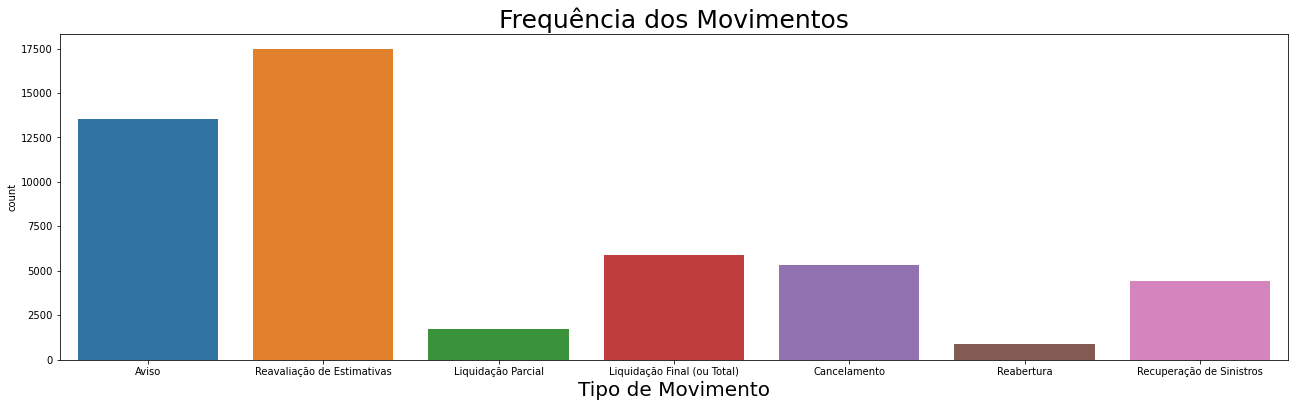

In [63]:
plt.figure(figsize=(22,6))
plt.title('Frequência dos Movimentos', fontsize=25)
sns.countplot(data['TPMOID'])
plt.xlabel('Tipo de Movimento', fontsize=20)
plt.show()

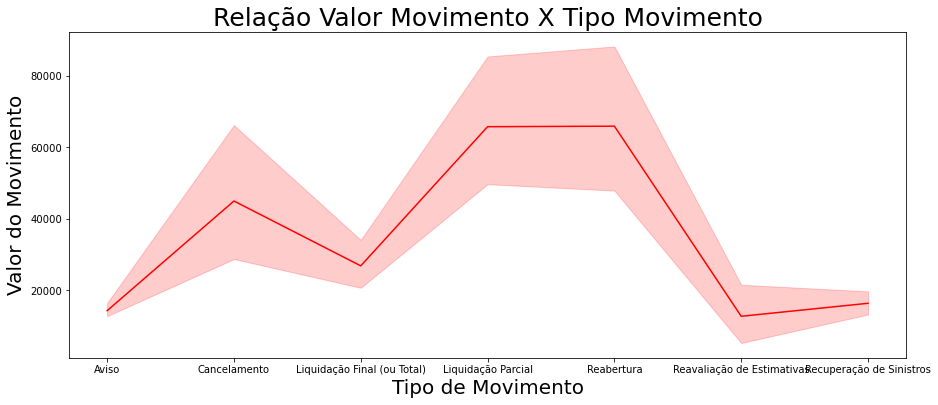

In [64]:
plt.figure(figsize=(15,6))
plt.title('Relação Valor Movimento X Tipo Movimento', fontsize=25)
sns.lineplot(x="TPMOID", y="fESRVALORMOV",data=data,color='red')
plt.xlabel('Tipo de Movimento', fontsize=20)
plt.ylabel('Valor do Movimento', fontsize=20)
plt.show()

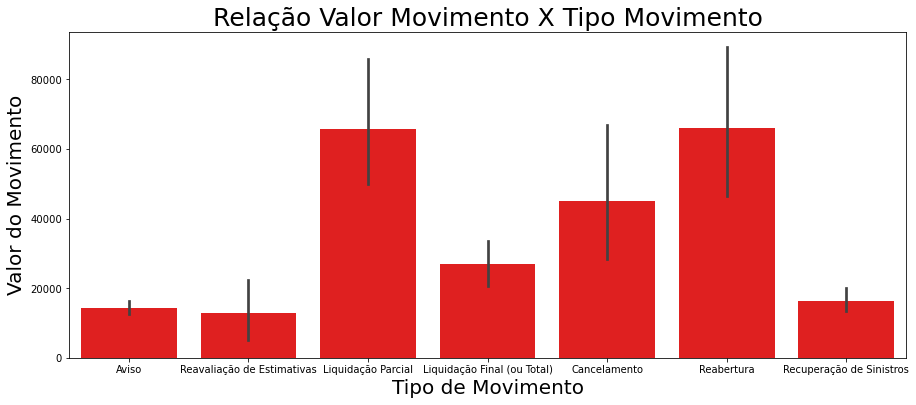

In [65]:
plt.figure(figsize=(15,6))
sns.barplot(x="TPMOID", y="fESRVALORMOV",data=data,color='red')
plt.title('Relação Valor Movimento X Tipo Movimento', fontsize=25)
plt.xlabel('Tipo de Movimento', fontsize=20)
plt.ylabel('Valor do Movimento', fontsize=20)
plt.show()

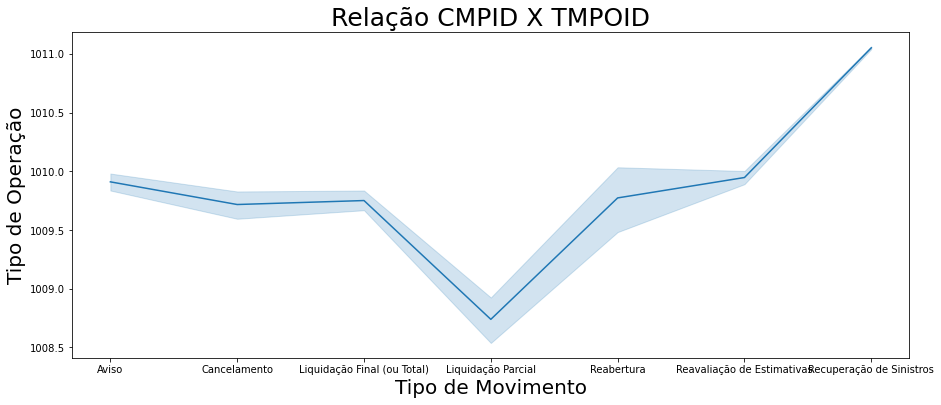

In [66]:
data['CMPID'] = data['CMPID'].astype('int64')
plt.figure(figsize=(15,6))
sns.lineplot(x="TPMOID", y="CMPID",data=data)
plt.title('Relação CMPID X TMPOID', fontsize=25)
plt.xlabel('Tipo de Movimento', fontsize=20)
plt.ylabel('Tipo de Operação', fontsize=20)
plt.show()

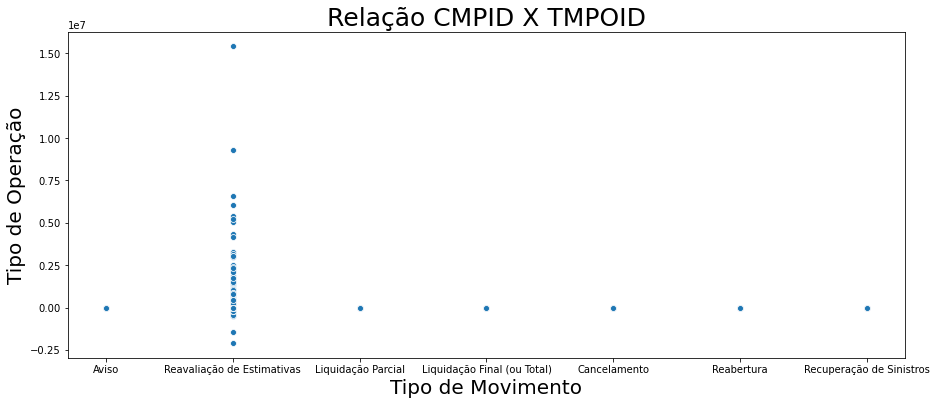

In [67]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="TPMOID", y="fESRVALORMON",data=data)
plt.title('Relação CMPID X TMPOID', fontsize=25)
plt.xlabel('Tipo de Movimento', fontsize=20)
plt.ylabel('Tipo de Operação', fontsize=20)
plt.show()

In [68]:
data.loc[:,'desc_CMPID'] = data['CMPID'].astype(str)
dicio = {'1001':'Direto','1002':'Cosseguro Aceito','1003':'Cosseguro Cedido','1004':'Salvados e Ressarcidos','1005':'Salvados e Ressarcidos ao Ressegurador','1011':'Recuperação de Resseguro de Sinistros já Pagos','1012':'Recuperação de Resseguro de Sinistros não Pagos','1006':'Direto','1007':'Cosseguro Aceito','1008':'Cosseguro Cedido','1009':'Salvados e Ressarcidos','1010':'Salvados e Ressarcidos ao Ressegurador','1013':'Recuperação de Resseguro de Sinistros não Pagos','1014':'Recuperação de Resseguro de Sinistros já Pagos'}
data['desc_CMPID'] = data['desc_CMPID'].map(dicio)
data['desc_CMPID'].value_counts()

Recuperação de Resseguro de Sinistros não Pagos    27521
Recuperação de Resseguro de Sinistros já Pagos     10799
Direto                                              7891
Cosseguro Cedido                                    1885
Cosseguro Aceito                                    1071
Salvados e Ressarcidos ao Ressegurador                37
Salvados e Ressarcidos                                18
Name: desc_CMPID, dtype: int64

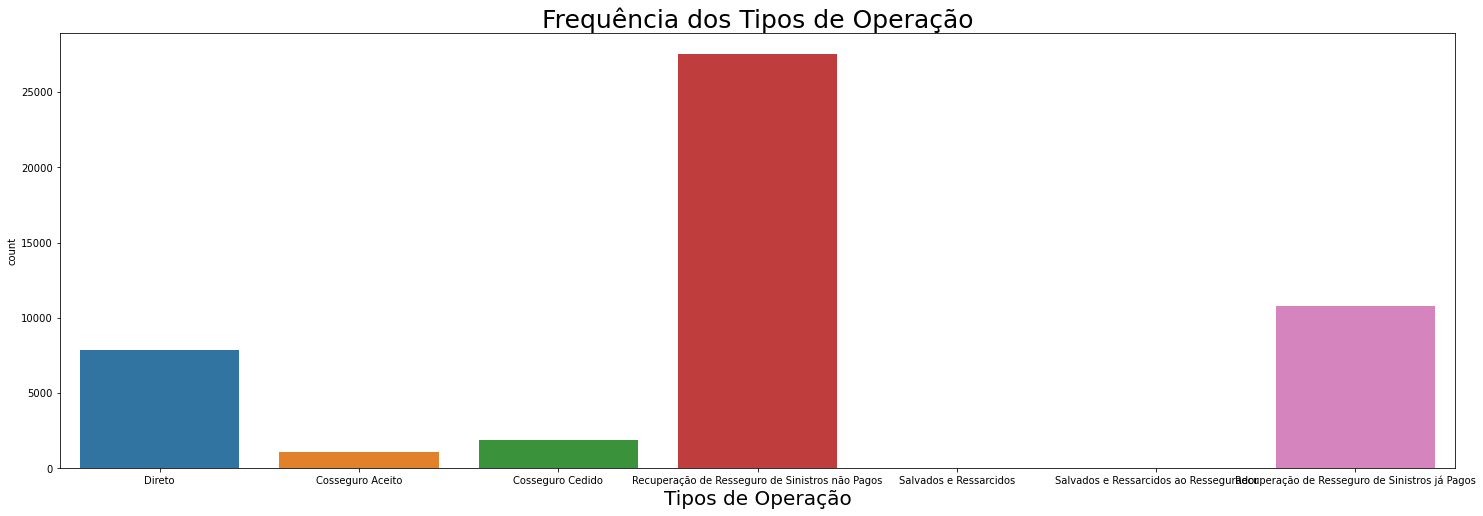

In [76]:
plt.figure(figsize=(25,8))
plt.title('Frequência dos Tipos de Operação', fontsize=25)
sns.countplot(data['desc_CMPID'])
plt.xlabel('Tipos de Operação', fontsize=20)
plt.show()

In [70]:
data.loc[:,'clas_CMPID'] = data['CMPID'].astype(str)
dicio = {'1001':'Administrativo','1002':'Administrativo','1003':'Administrativo','1004':'Administrativo','1005':'Administrativo','1011':'Administrativo','1012':'Administrativo','1006':'Judicial','1007':'Judicial','1008':'Judicial','1009':'Judicial','1010':'Judicial','1013':'Judicial','1014':'Judicial'}
data['clas_CMPID'] = data['clas_CMPID'].map(dicio)
data['clas_CMPID'].value_counts()

Administrativo    40186
Judicial           9036
Name: clas_CMPID, dtype: int64

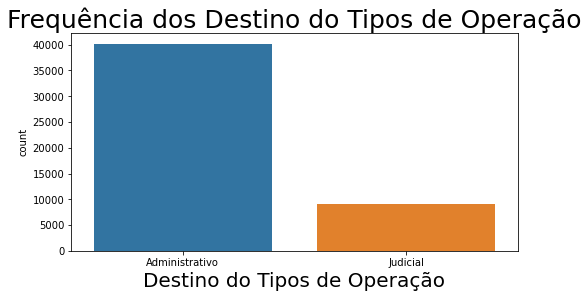

In [71]:
plt.figure(figsize=(8,4))
plt.title('Frequência dos Destino do Tipos de Operação', fontsize=25)
sns.countplot(data['clas_CMPID'])
plt.xlabel('Destino do Tipos de Operação', fontsize=20)
plt.show()

In [72]:
x = (len(df_main) +1)
count = []
for i in range(1,x):
    count.append(i)

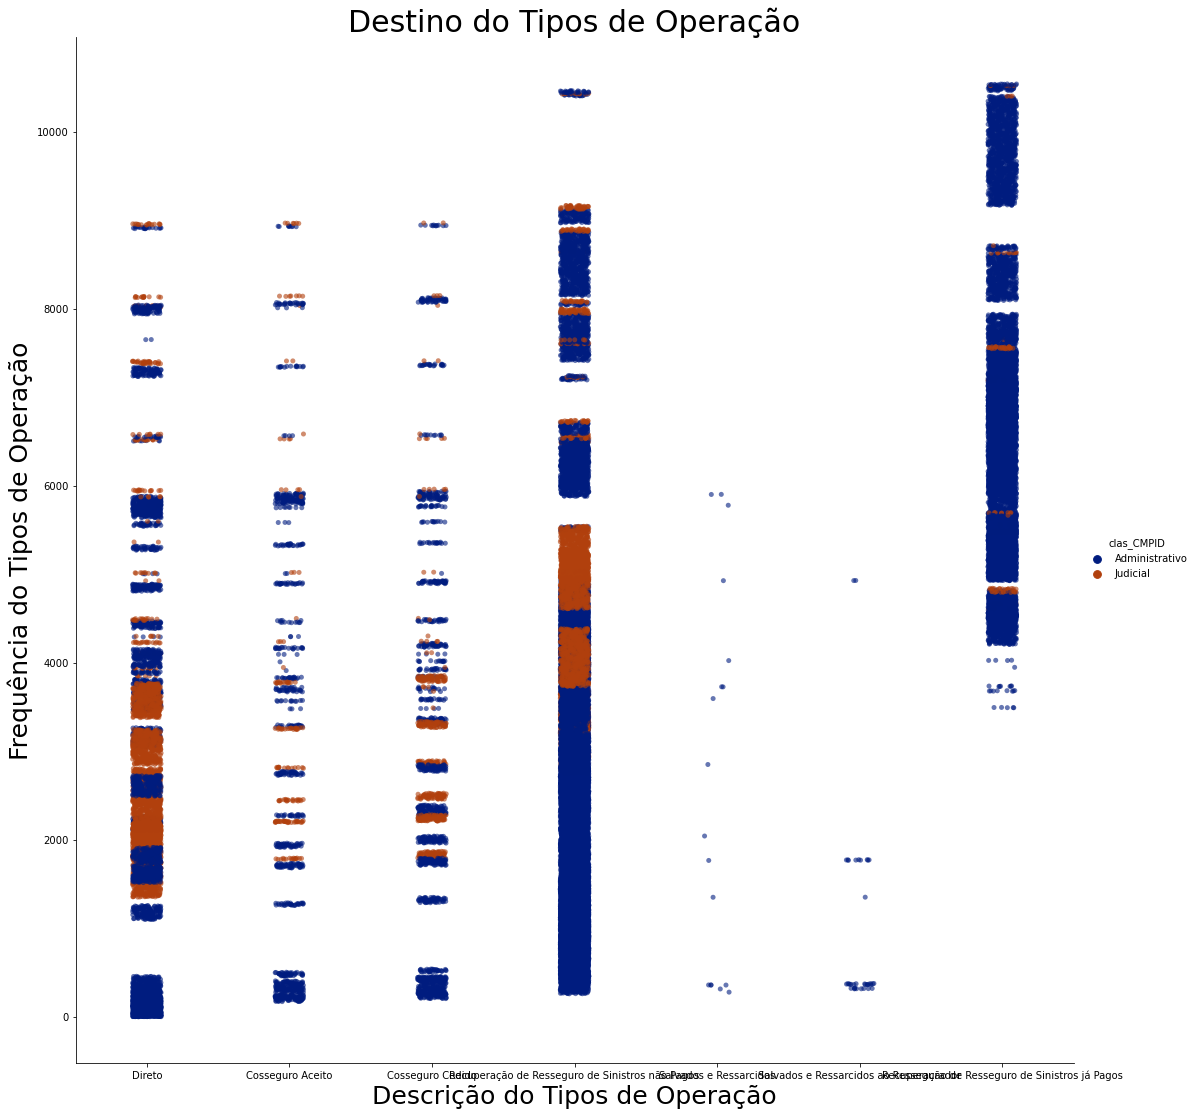

In [73]:
data['ESRSEQ'] = data['ESRSEQ'].astype('int64')
sns.catplot(x='desc_CMPID',y='ESRSEQ',hue='clas_CMPID',data=data,ci="sd", palette="dark", alpha=.6, height=15)
plt.title('Destino do Tipos de Operação', fontsize=30)
plt.xlabel('Descrição do Tipos de Operação', fontsize=25)
plt.ylabel('Frequência do Tipos de Operação', fontsize=25)
plt.yticks=([0,5000,10000])
plt.show()

In [74]:
data.head()

,ESRSEQ,ENTCODIGO,MRFMESANO,QUAID,TPMOID,CMPID,RAMCODIGO,ESRDATAINICIO,ESRDATAFIM,ESRDATAOCORR,...,DTESRDATAFIM,DTESRDATAOCORR,DTESRDATAREG,DTESRDATACOMUNICA,fESRVALORMOV,fESRVALORMON,Criador,Data do output,desc_CMPID,clas_CMPID
0,1,05991,20200131,376,Aviso,1001,0118,20190220,20200220,20200126,...,2020-02-20,2020-01-26,2020-01-30,2020-01-30,250000.0,0.0,Haylton,2020-09-23 15:31:25.447385,Direto,Administrativo
1,2,05991,20200131,376,Aviso,1001,0118,20190630,20200630,20191030,...,2020-06-30,2019-10-30,2020-01-15,2020-01-15,25000.0,0.0,Haylton,2020-09-23 15:31:25.447385,Direto,Administrativo
2,3,05991,20200131,376,Aviso,1001,0118,20190630,20200630,20191120,...,2020-06-30,2019-11-20,2020-01-24,2020-01-24,25000.0,0.0,Haylton,2020-09-23 15:31:25.447385,Direto,Administrativo
3,4,05991,20200131,376,Aviso,1001,0118,20190630,20200630,20200112,...,2020-06-30,2020-01-12,2020-01-16,2020-01-16,25000.0,0.0,Haylton,2020-09-23 15:31:25.447385,Direto,Administrativo
4,5,05991,20200131,376,Aviso,1001,0118,20190930,20200630,20191228,...,2020-06-30,2019-12-28,2020-01-17,2020-01-17,25000.0,0.0,Haylton,2020-09-23 15:31:25.447385,Direto,Administrativo
